# Build Infrastructure in Azure with Powershell

Pre-requisites: 
- Azure account
- Terraform 0.14.9 or later
- Azure CLI 

In [ ]:
# Install the Azure CLI tool
Invoke-WebRequest -Uri https://aka.ms/installazurecliwindows -OutFile .\AzureCLI.msi; Start-Process msiexec.exe -Wait -ArgumentList '/I AzureCLI.msi /quiet'; rm .\AzureCLI.msi

## 1. Authenticate using the Azure CLI

In [ ]:
az login

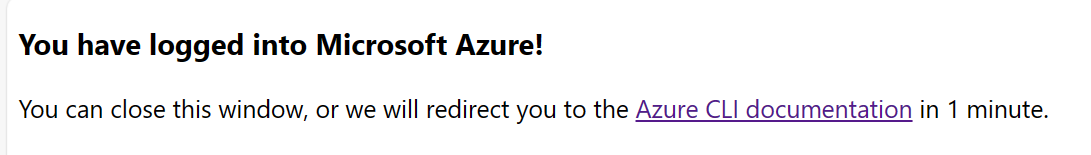

In [ ]:
# Using Azure account subscription ID, set the account with the Azure CLI: 
az account set --subscription "<SUBSCRIPTION_ID>"

# Create a Service Principal
az ad sp create-for-rbac --role="Contributor" --scopes="/subscriptions/<SUBSCRIPTION_ID>"

# Set the environment variables using Service Principal output values
$Env:ARM_CLIENT_ID = "<APPID_VALUE>"
$Env:ARM_CLIENT_SECRET = "<PASSWORD_VALUE>"
$Env:ARM_SUBSCRIPTION_ID = "<SUBSCRIPTION_ID>"
$Env:ARM_TENANT_ID = "<TENANT_VALUE>"

## 2. Create Configuration File

In [ ]:
New-Item -Name "azure-solaris" -ItemType "directory" # Create a new directory in the current location
cd "azure-solaris" # move into new directory
New-Item -Name "solaris-main.tf" -ItemType "file" # add configuration file
vim solaris-main.tf # open file in a text editor and add the configuration code

## 3. Initialise Terraform, check format, validate syntax and apply

In [ ]:
terraform init # initialise working directory
terraform fmt # check format 
terraform validate # validate if the file has correct syntax
terraform apply # execute terraform plan

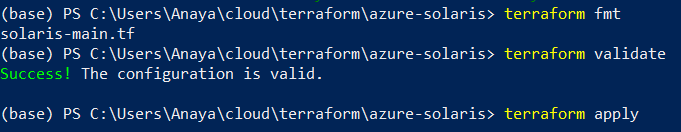

## 4. State Inspection


In [ ]:
# Show content of terraform.tfstate file with the IDs and properties of all created resources
terraform show 

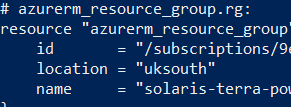